# Regresión Lineal Multiple
## Dataset : StreetEasy Dataset

In [43]:
# Cargando librerias
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
# Para esta regresión lineal multiple usaremos el dataset de la ciudad de Brooklyn
df = pd.read_csv("brooklyn.csv")
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2869,3600,3.0,2,900,4,1.0,15,1,0,0,0,0,0,0,0,Williamsburg,Brooklyn
1,4318,3900,3.0,2,1000,4,9.0,8,0,0,0,0,1,0,0,0,Greenwood,Brooklyn
2,6265,2700,2.0,1,900,4,2.0,96,0,0,0,0,0,0,0,0,Gowanus,Brooklyn
3,24,4900,1.0,1,1216,6,3.0,88,0,0,0,0,0,0,0,0,Brooklyn Heights,Brooklyn
4,9481,3900,0.0,1,1100,3,4.0,85,1,0,0,0,0,0,0,0,Williamsburg,Brooklyn


In [90]:
# Creamos set entrenamiento y testeo 70:30
from sklearn.model_selection import train_test_split
X = df.drop(columns=["rent","neighborhood","borough"]) # Queremos todas las columnas menos la variable respuesta, tambien botamos las columnas con categorias con texto (más adelante veremos como transformarlos a número)
y = df["rent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 6)

In [92]:
# Creando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
regmulti = LinearRegression()
regmulti.fit(X_train,y_train)

LinearRegression()

In [93]:
# Probamos el modelo
y_predict = regmulti.predict(X_test)


In [94]:
# Realicemos una predicción de precio de departamento para:
# 1 pieza
# 1 baño
# 620 square feet
# 16 minutos al subway
# Piso 1
# 98 años de antigüedad
# no_fee (1)
# has_roodeck (1)
# has_washer_dryer (1)
# has_doorman (0)
# has_elevator (0)
# has_dishwasher (1)
# has_patio (1)
# has_gym (0)
departamento = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 1,0, 0, 1, 1, 0]]
prediccion_depa = regmulti.predict(departamento)

print("Valor: $%.2f" % prediccion_depa)

Valor: $470282.61


C:\Users\chuck\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


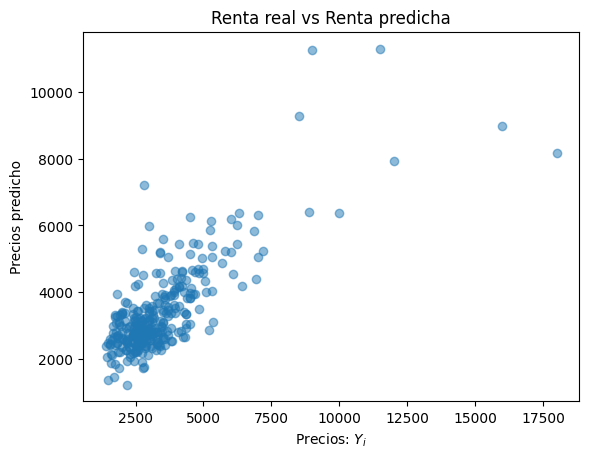

In [57]:
# Visualizando los resultados entre datos reales y predichos
plt.scatter(y_test,y_predict, alpha=0.5)
plt.xlabel("Precios: $Y_i$")
plt.ylabel("Precios predicho")
plt.title("Renta real vs Renta predicha")
plt.show()


In [62]:
# Coeficientes (15 variables)
regmulti.coef_

array([-5.09765867e-03, -1.73116450e+02,  7.54990734e+02,  2.84598161e+00,
       -3.47846633e+01,  1.49412612e+01, -3.60070056e+00,  1.13674812e+02,
        8.86484754e+01, -1.97337688e+01, -2.85269626e+02,  1.00402478e+02,
        2.32433102e+00,  4.97899575e+02,  3.92602466e+02])

# Viendo el comportamiento de las variables dentro del modelo

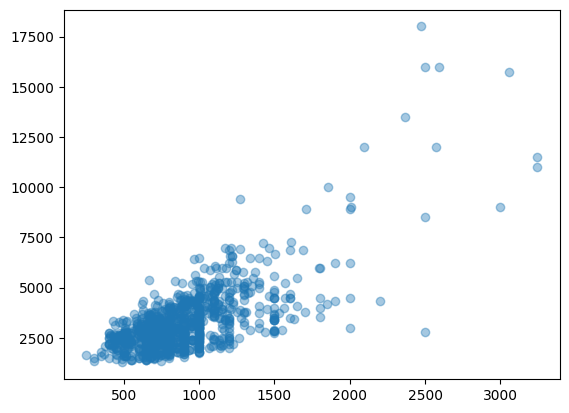

In [84]:
# Revisando correlación size_qft con renta
plt.scatter(df["size_sqft"],df["rent"],alpha=0.4)


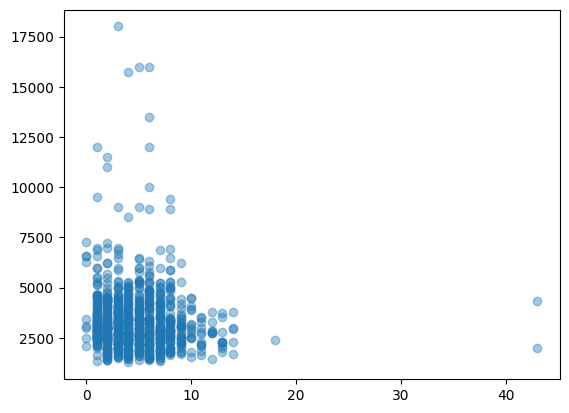

In [85]:
# Minutos al tren con renta
plt.scatter(df["min_to_subway"],df["rent"],alpha=0.4)

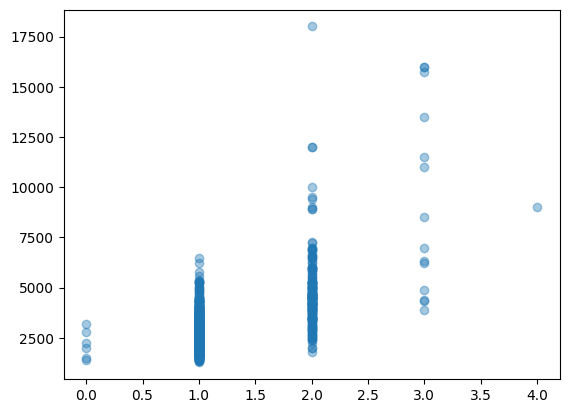

In [87]:
# Numero de baños vs renta
plt.scatter(df["bathrooms"],df["rent"],alpha=0.4)
# Departamentos sin baños!?, suelen tener menor precio.

## Evaluando el modelo

In [97]:
# Obtengamos el R^2 del train
regmulti.score(X_train,y_train)

0.6059770887998543

In [98]:
# Obtengamos el R^2 del test
regmulti.score(X_test,y_test)

0.6042335985893997

In [103]:
# Este ejercicio no cubre Analisis de residuales!!!